In [ ]:
!pip3 install kymatio
!pip3 install scikit-cuda
!pip uninstall --y torchvision
!pip install torch==1.7.0 torchvision==0.8.0
import numpy as np 
import os,csv
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchsummary import summary
import random
from torchvision import transforms
import torch.optim
from PIL import Image
from kymatio.torch import Scattering2D
import pickle
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 102kB 5.8MB/s 
     |████████████████████████████████| 122kB 7.5MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 1.7MB 12.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 10.2MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627913 sha256=f6f6e03230088da76d595e1e6f989280a81c48d770b12220cd952252b07628e4
  Stored in directory: /root/.cache/pip/wheels/d5/55/64/fd4dddcc5f1c25eebd90b5291c3769101dc978c70165685512
Successfully built pycuda
  Created wheel for pytools: filename=pytools-2021.2.5-py2.py3-none-any.whl size=60506 sha256=c0e16df43542fc0a09956d084aa8c7fc9886dc918fc93dbdc8d65460d328e7f0
  Stored in directory: /root/.cache/pip/wheels/3f/43/1f/c32f938dff9dfb812279379eb51eeb49535ef1fdfe6a91ea5c
Successfully built pytools
Uninstalli

In [ ]:
# !unzip -q /content/drive/MyDrive/cv/DUNET-HC-18_Data/DUNET.zip -d /content/drive/MyDrive/cv/DUNET-HC-18_Data/

In [ ]:
import csv
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# 4/1AY0e-g4UbHq_CkCkQLG7ug0yUnXepWmT7pS_gsiVPgrnh2-PU7RKqA7JzTk|

Mounted at /content/drive


In [ ]:
import numpy as np 
import os,csv
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchsummary import summary
import random
from torchvision import transforms
import torch.optim
from PIL import Image
from kymatio.torch import Scattering2D
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#UNET with attention

In [ ]:
NUM_EPOCHS = 25
BATCH_SIZE = 4
LEARNING_RATE = 1e-3

In [ ]:
def getImageName(filename):
    imageName = filename[:-4] + '_Annotation.png'
    return imageName

In [ ]:
class HeadDataset(Dataset):
    def __init__(self, image_path, mask_path, files, transform=None):
        self.image_path = image_path
        self.mask_path = mask_path
        self.files = files
        self.transform = transform
        
    def __len__(self):
        return len(self.files)
        
    def __getitem__(self, idx):
        
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        
        img_name = os.path.join(self.image_path,self.files[idx])
        mask_name = os.path.join(self.mask_path,getImageName(self.files[idx]))
        
        image = Image.open(img_name).convert('L')
        mask = Image.open(mask_name).convert('L')
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        image = image.to(device=device)
        mask = mask.to(device=device)
        
        sample = {'image': image, 'mask': mask}
        return sample

In [ ]:
# base_folder = '/content/drive/MyDrive/hc18/training_set'
base_folder = '/content/drive/MyDrive/cv/DUNET-HC-18_Data/DUNET/hc18/training_set/training_set'
image_folder = base_folder
mask_folder = base_folder

In [ ]:
# traindir='/content/drive/MyDrive/cv/DUNET-HC-18_Data/DUNET/hc18/training_set/training_set'
# i=0
# trainname=[]
# # start=0
# # with open("/content/drive/MyDrive/hc18/training_set_pixel_size_and_HC.csv",'r') as s:
# with open("/content/drive/MyDrive/cv/DUNET-HC-18_Data/training_set_pixel_size_and_HC.csv",'r') as s:
#     r=csv.reader(s)
#     for com in r:
#         # if (start>20):
#         #   break
#         # start+=1
#         if i==0:
#             i+=1
#         else:
#             i+=1
#             trainname.append(com[0])
# files=trainname

In [ ]:
transform = transforms.Compose([
    transforms.Resize((544, 800)),
    transforms.ToTensor()
])

In [ ]:
# train, val = train_test_split(files, test_size = 0.2)
# with open('/content/drive/MyDrive/cv/anushree/HC-18/train.pkl', 'wb') as fid:
#     pickle.dump(train, fid)
# with open('/content/drive/MyDrive/cv/anushree/HC-18/val.pkl', 'wb') as fid:
#     pickle.dump(val, fid)

with open('/content/drive/MyDrive/cv/anushree/HC-18/train.pkl', 'rb') as fid:
    train = pickle.load(fid)
with open('/content/drive/MyDrive/cv/anushree/HC-18/val.pkl', 'rb') as fid:
    val = pickle.load(fid)
    
Head_Train_Dataset = HeadDataset(image_folder,mask_folder,train,transform)
trainLoader = DataLoader(Head_Train_Dataset, batch_size=BATCH_SIZE,shuffle=True)

Val_Dataset = HeadDataset(image_folder,mask_folder,val,transform)
valLoader = DataLoader(Val_Dataset, batch_size=BATCH_SIZE,shuffle=True)
# DME_Val_Dataset = DMEDataset(val_frame_path,val_masks_path)
# DME_Test_Dataset = DMEDataset(test_frame_path,test_masks_path)
# valDataSet = DataLoader(DME_Val_Dataset, batch_size=1,shuffle=True)
# testDataSet = DataLoader(DME_Test_Dataset, batch_size=1,shuffle=True)

In [ ]:
class diceloss(torch.nn.Module):
    def init(self):
        super(diceLoss, self).init()
    def forward(self, target, pred):
       smooth = 1.
       iflat = pred.contiguous().view(-1)
       tflat = target.contiguous().view(-1)
       intersection = (iflat * tflat).sum()
       A_sum = torch.sum(iflat * iflat)
       B_sum = torch.sum(tflat * tflat)
       return 1 - ((2. * intersection + smooth) / (A_sum + B_sum + smooth))

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch > /dev/null 2>&1 # Install segmentations_models.pytorch, with no bash output.

In [ ]:
import segmentation_models_pytorch as smp
model = smp.Unet("resnet34", encoder_weights="imagenet", in_channels=1, classes=1).to(device)

criterion = diceloss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=LEARNING_RATE*0.1)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-8, momentum=0.9)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min' if net.n_classes > 1 else 'max', patience=2)

In [ ]:
model

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
def iou_binary(out, labels, EMPTY=1., ignore=None, per_image=True, threshold=0.5):
    """
    IoU for foreground class
    binary: 1 foreground, 0 background
    """
    out = torch.sigmoid(out)
    preds = (out.data > threshold).long()
    if not per_image:
        preds, labels = (preds,), (labels,)
    ious = []
    for pred, label in zip(preds, labels):
        intersection = ((label == 1) & (pred == 1)).sum()
        union = ((label == 1) | ((pred == 1) & (label != ignore))).sum()
        if not union:
            iou = EMPTY
        else:
            iou = float(intersection) / float(union)
        ious.append(iou)
    iou = np.mean(np.array(ious))    # mean accross images if per_image
    return 100 * iou

In [ ]:
iou_score_train = []
dice_loss_train = []
iou_score_val= []
dice_loss_val = []

best_iou_score = -np.inf
for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times
    running_loss = 0.0
    ##training
    model.train()
    for i, data in enumerate(trainLoader, 0):

        iou = []
        loss_arr = []
        # get the inputs; data is a list of [inputs, labels]
        images = data['image']
        masks = data['mask']

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, masks)
        print("Training: Mini - Batch ",i,"Loss", loss.item())
        with torch.no_grad():
            outputs = model(images)
            iou.append(iou_binary(outputs, masks, per_image=True, threshold=0.59))
            loss_arr.append(loss.item())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    iou_score_train.append(np.mean(iou))
    dice_loss_train.append(np.mean(loss_arr))

    ##evaluation
    model.eval()
    with torch.no_grad():
        iou = []
        loss_arr = []
        for k, data in enumerate(valLoader, 0):
            # get the inputs; data is a list of [inputs, labels]
            images = data['image'].to(device)
            masks = data['mask'].to(device)
            # scatters = data['scatter']

            outputs = model(images)
            loss = criterion(outputs, masks)
            print("Validation: Mini - Batch ",k,"Loss", loss.item())

            outputs = model(images)
            iou.append(iou_binary(outputs, masks, per_image=True, threshold=0.59))
            loss_arr.append(loss.item())
   
    iou_score_val.append(np.mean(iou))
    dice_loss_val.append(np.mean(loss_arr))

    with open('/content/drive/MyDrive/cv/anushree/HC-18/best-model_unet-smp/epoch_iousAndArrays.pkl', 'wb') as fid:
        pickle.dump({'iou_score_train':iou_score_train, 'dice_loss_train': dice_loss_train, 'iou_score_val':iou_score_val, 'dice_loss_val':dice_loss_val}, fid)

    if epoch % 1 == 0:
        print("Epoch [{}]: Train - iou: {}, loss: {}; Val - iou: {}, loss: {}".format(epoch, iou_score_train[-1], dice_loss_train[-1], iou_score_val[-1], dice_loss_val[-1]))
        running_loss = 0.0
    

    if iou_score_val[-1]>best_iou_score:
        best_iou_score = iou_score_val[-1]
        torch.save(model.state_dict(), "/content/drive/MyDrive/cv/anushree/HC-18/best-model_unet-smp/best-model")
        with open('/content/drive/MyDrive/cv/anushree/HC-18/best-model_unet-smp/best_iou.pkl', 'wb') as fid:
            pickle.dump(best_iou_score, fid)
    

print('Finished Training')

In [ ]:
print(best_iou_score)

In [ ]:
with open('/content/drive/MyDrive/cv/anushree/HC-18/best-model_unet-smp/epoch_iousAndArrays.pkl', 'rb') as fid:
    data = pickle.load(fid)
    iou_score_train = data['iou_score_train']
    dice_loss_train = data['dice_loss_train']
    iou_score_val = data['iou_score_val']
    dice_loss_val = data['dice_loss_val']
    print(dice_loss_val[np.argmax(iou_score_val)])
    print(np.max(iou_score_val))

In [ ]:
epoch_train_losses = dice_loss_train
epoch_train_iou = iou_score_train
epoch_val_losses = dice_loss_val
epoch_val_iou = iou_score_val
print(epoch_train_losses)
print(epoch_train_iou)
print(epoch_val_losses)
print(epoch_val_iou)

def plot(scores, name):
    plt.figure(figsize=(15,5))
    plt.plot(range(len(scores)), scores, label=f'train {name}')
    #plt.plot(range(len(scores["train"])), scores["val"], label=f'val {name}')
    plt.title(f'{name} plot'); plt.xlabel('Epoch'); plt.ylabel(f'{name}');
    plt.legend(); 
    plt.show()

In [ ]:
#25epochs-test_train split
plot(epoch_train_losses, "Training loss")
plot(epoch_train_iou, "Training-iou score")
plot(epoch_val_losses, "Val loss")
plot(epoch_val_iou, "Val-iou score")

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/cv/anushree/HC-18/best-model_unet-smp(dont touch)/best-model'))

<All keys matched successfully>

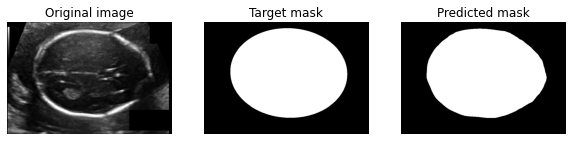

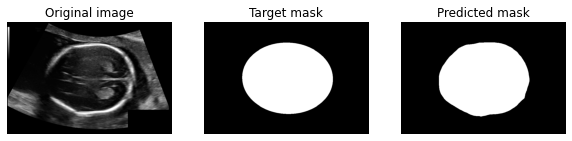

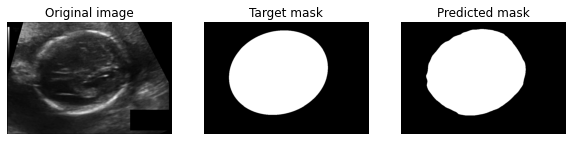

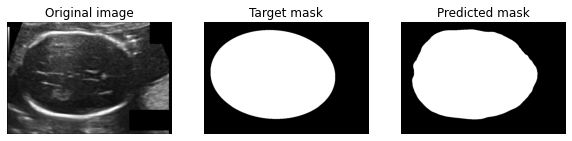

Finished Evaluation


In [ ]:
# evaluate model:
model.eval()
iou = []
with torch.no_grad():
    for k, data in enumerate(valLoader, 0):
        # get the inputs; data is a list of [inputs, labels]
        images = data['image'].to(device)
        masks = data['mask'].to(device)
        # scatters = data['scatter']

        # forward + backward + optimize
        # print("image:",images.shape)
        # print("masks:",masks.shape)
        outputs = model(images)
        iou.append(iou_binary(outputs, masks, per_image=True, threshold=0.59))


        # loss = criterion(out, masks)
        # print("Mini - Batch ",k,"Loss", loss.item())
        # print("output:",outputs.shape)

        # Detach
        # print(images[0].shape)
        
        # Plot and see
        

        # i = 0
        for i in range(images.shape[0]):
            f, ax = plt.subplots(1,3,figsize=(10,10))
            
            ax[0].axis('off')
            ax[0].set_title('Original image')
            ax[1].axis('off')
            ax[1].set_title('Target mask')
            ax[2].axis('off')
            ax[2].set_title('Predicted mask')
            image = transforms.ToPILImage()(images[i])
            ax[0].imshow(image,cmap='gray')
            mask = transforms.ToPILImage()(masks[i])

            ax[1].imshow(mask,cmap='gray')
            output = torch.sigmoid(outputs[i])
            output = (output.data > 0.59).long()
            # print(output)
            # output = transforms.ToPILImage()(output)
            output = torch.squeeze(output, 0)

            ax[2].imshow(output.cpu(),cmap='gray')
            plt.show()

        # i = 1
        # image = transforms.ToPILImage()(images[i])
        # plt.subplot(3,3,3*i+1)
        # plt.imshow(image, 'gray')
        # mask = transforms.ToPILImage()(masks[i])
        # plt.subplot(3,3,3*i+2)
        # plt.imshow(mask,cmap='gray')
        # output = torch.sigmoid(outputs[i])
        # output = (output.data > 0.57).long()
        # print(output)
        # # output = transforms.ToPILImage()(output)
        # output = torch.squeeze(output, 0)
        # # output = transforms.ToPILImage()(outputs[i])
        # plt.subplot(3,3,3*i+3)
        # plt.imshow(output.cpu(),cmap='gray')

        # i = 2
        # image = transforms.ToPILImage()(images[i])
        # plt.subplot(3,3,3*i+1)
        # plt.imshow(image, 'gray')
        # mask = transforms.ToPILImage()(masks[i])
        # plt.subplot(3,3,3*i+2)
        # plt.imshow(mask,cmap='gray')
        # # output = transforms.ToPILImage()(outputs[i])
        # # output=np.array(output)
        # # output[output>75]=255
        # # output[output<=75]=0
        # output = torch.sigmoid(outputs[i])
        # output = (output.data > 0.57).long()
        # print(output)co
        # # output = transforms.ToPILImage()(output)
        # output = torch.squeeze(output, 0)
        # plt.subplot(3,3,3*i+3)
        # plt.imshow(output.cpu(),cmap='gray')
        # # print(np.array(output))
    
        # # print(output.max())
        # # print(output.mean())
        break

print('Finished Evaluation')
# print('iou:',np.mean(iou))